# Chemical and physicochemical nonlinear classification tasks

**Author**: M.G. Baltussen

**Estimated runtime**: 15 minutes 

**Generated output**: 
- `plots/classification_inputs_example.svg` (manuscript fig. 2)
- `plots/classification_task_example.svg` (manuscript fig. 2)
- `plots/classification_output_example.svg` (manuscript fig. 2)
- `plots/sensor_tasks.svg` (manuscript fig. 2)
- `plots/sensor_inputs.svg` (manuscript fig. 2)
- `plots/SI_sensor_inputs.svg` (SI fig. 9)
- `plots/sensor_results.svg` (manuscript fig. 2)
- `plots/SI_sensor_results.svg` (SI fig. 9)

In [6]:
import pandas as pd
import numpy as np

import sklearn.preprocessing as preprocessing

import matplotlib.pyplot as plt
import seaborn as sns
import style
style.set_style()


In [7]:
extends_pH = (6.0, 8.5)
extends_T = (25.0, 55.0)
extends_s1 = (40.0, 100.0)
extends_s2 = (15.0, 75.0)

In [8]:

dropped_columns = ['author', 'exp_code', 'type', 'exp_date', 'measurement_date', 'measurement_time', 'sample', 'flowrate',
                   'TKIFKI', 'TTMHPRL',
                   'T', 'pH', 'SSVRWWSDDEWRW', 
                   'CCF(pS)WRCRC', 'IYPFVEPI'
                   ]

df_data_S = pd.read_csv("../data/RC_S1_S2.csv", index_col=0).drop(columns=dropped_columns).rename(columns = {
                        'AVNIPFKVHLRCKAAFC': 'S1',
                        'CCFSWRCRC': 'S2'
                        })
# Seperate dataset inputs and outputs
U_chem = df_data_S[['S1','S2']] # inputs
X_chem = df_data_S.drop(columns=['S1', 'S2']) # outputs

scaler_s1_s2 = preprocessing.MinMaxScaler().fit(pd.DataFrame({'S1': extends_s1, 'S2': extends_s2}))
scaler_T_s2 = preprocessing.MinMaxScaler().fit(pd.DataFrame({"T": extends_T, "S2": extends_s2}))
scaler_ph_s2 = preprocessing.MinMaxScaler().fit(pd.DataFrame({"pH": extends_pH, "S2": extends_s2}))
scaler_ph_T = preprocessing.MinMaxScaler().fit(pd.DataFrame({"pH": extends_pH, "T": extends_T}))
U_s = scaler_s1_s2.transform(U_chem)
X_s = preprocessing.StandardScaler().fit_transform(X_chem)

dropped_columns = ['author', 'exp_code', 'type', 'exp_date', 'measurement_date', 'measurement_time', 'sample', 'flowrate',
                   'TKIFKI', 'TTMHPRL',
                   'SSVRWWSDDEWRW', 
                   'CCF(pS)WRCRC', 'IYPFVEPI'
                   ]


df_T_S2 = pd.read_csv("../data/RC_T_S2.csv", index_col=0).drop(columns=dropped_columns).rename(columns = {
                        'AVNIPFKVHLRCKAAFC': 'S1',
                        'CCFSWRCRC': 'S2'
                        }).drop(columns=['pH', 'S1'])
df_pH_S2 = pd.read_csv("../data/RC_pH_S2.csv", index_col=0).drop(columns=dropped_columns).rename(columns = {
                        'AVNIPFKVHLRCKAAFC': 'S1',
                        'CCFSWRCRC': 'S2'
                        }).drop(columns=['T', 'S1'])
df_pH_T = pd.read_csv("../data/RC_pH_T.csv", index_col=0).drop(columns=dropped_columns).rename(columns = {
                        'AVNIPFKVHLRCKAAFC': 'S1',
                        'CCFSWRCRC': 'S2'
                        }).drop(columns=['S1', 'S2'])

# Seperate dataset inputs and outputs
U_T_S2 = df_T_S2[['T','S2']] # inputs
X_T_S2 = df_T_S2.drop(columns=['T', 'S2']) # outputs
U_pH_S2 = df_pH_S2[['pH','S2']] # inputs
X_pH_S2 = df_pH_S2.drop(columns=['pH', 'S2']) # outputs
U_pH_T = df_pH_T[['pH','T']] # inputs
X_pH_T = df_pH_T.drop(columns=['pH', 'T']) # outputs

U_T_S2 = scaler_T_s2.transform(U_T_S2)
U_pH_S2 = scaler_ph_s2.transform(U_pH_S2)
U_pH_T = scaler_ph_T.transform(U_pH_T)
X_T_S2 = preprocessing.StandardScaler().fit_transform(X_T_S2)
X_pH_S2 = preprocessing.StandardScaler().fit_transform(X_pH_S2)
X_pH_T = preprocessing.StandardScaler().fit_transform(X_pH_T)

In [9]:
""" Classification task definitions """
from collections import OrderedDict

y_xor = lambda U: np.logical_xor(U[:,0] < 0.5, U[:,1] < 0.5)
y_circle = lambda U: ((U[:,0]-0.5)**2 + (U[:,1]-0.5)**2) < 0.125
y_hourglass = lambda U: ((U[:,0] < U[:,1]) & (U[:,0] < (1 - U[:,1]))) | ((U[:,0] > U[:,1]) & (U[:,0] > (1 - U[:,1])))

N_POINTS = 1000
EXTENDS = (-0.1, 1.1)
xs, ys = np.meshgrid(np.linspace(*EXTENDS, N_POINTS), np.linspace(*EXTENDS, N_POINTS))
z_xor = np.logical_xor(xs < 0.5, ys < 0.5)
z_circle = ((xs-0.5)**2 + (ys-0.5)**2) < 0.125

z_hourglass = ((xs < ys) & (xs < (1 - ys))) | ((xs > ys) & (xs > (1 - ys)))

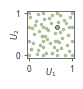

In [10]:
fig, axes = plt.subplots(figsize=(0.6, 0.6),
                        constrained_layout=False)

axes.scatter(*U_s.T, s=4, c='C2')
axes.scatter(*U_s[10], s=8, c='C2', ec=style.nord_base.dark[0])
axes.set_xlabel(r"$U_1$", va='bottom')
axes.set_ylabel(r"$U_2$", va='top')
axes.set_xticks([0, 1])
axes.set_yticks([0, 1])
sns.despine(top=False, right=False)
plt.savefig("../plots/classification_inputs_example.svg")

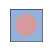

In [11]:
fig, ax = plt.subplots(figsize=(0.4, 0.4),
                        constrained_layout=True)

ax.imshow(z_circle, origin="lower", aspect="auto", interpolation="none",
        extent=(*EXTENDS, *EXTENDS), alpha=0.5,
        cmap=sns.color_palette("vlag", as_cmap=True),
    )
sns.despine(ax=ax, top=False, right=False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim([0,1])
ax.set_ylim([0,1])
plt.savefig("../plots/classification_task_example.svg")
plt.show()

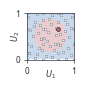

In [12]:
fig, axes = plt.subplots(figsize=(0.6, 0.6),
                        constrained_layout=False)
axes.imshow(z_circle, origin="lower", aspect="auto", interpolation="none",
        extent=(*EXTENDS, *EXTENDS), alpha=0.25,
        cmap=sns.color_palette("vlag", as_cmap=True),
    )
axes.scatter(*U_s.T, s=4, c=style.nord_base.light[0], ec=style.nord_base.dark[0], lw=0.2)
axes.scatter(*U_s[10], s=8, c='C3', ec=style.nord_base.dark[0])
axes.set_xlabel(r"$U_1$", va='bottom')
axes.set_ylabel(r"$U_2$", va='top')
axes.set_xticks([0, 1])
axes.set_yticks([0, 1])
axes.set_xlim([0,1])
axes.set_ylim([0,1])
sns.despine(top=False, right=False)
plt.savefig("../plots/classification_output_example.svg")

In [13]:
from sklearn import svm, gaussian_process, neural_network, linear_model
from pyrcn.extreme_learning_machine import ELMClassifier
from sklearn import metrics, model_selection

classifiers = {
    "LSVC": svm.LinearSVC(max_iter=10_000, tol=1e-4, dual=True),
    "SVC": svm.SVC(max_iter=10_000, tol=1e-4),
    "GP": gaussian_process.GaussianProcessClassifier(),
    "MLP": neural_network.MLPClassifier(max_iter=10_000),
    "ELM": ELMClassifier(regressor=linear_model.Ridge()),
}
N_classifiers = len(classifiers)
classifier_labels = ['ERC'] + list(classifiers.keys())

def classification_task(U, X, y_task, n_repeats=10):
    train_scores = dict()
    test_scores = dict()
    test_scores_std = dict()

    N_inputs = U.shape[0] # Number of different inputs

    reg = svm.LinearSVC(max_iter=10_000, C=1, tol=1e-4, dual=True)
    scores = model_selection.cross_validate(
        reg, X, y_task,
        scoring = metrics.make_scorer(metrics.matthews_corrcoef),
        cv = model_selection.RepeatedStratifiedKFold(
            n_splits=N_inputs//5, n_repeats=n_repeats,
        ),
        n_jobs=1,
        return_estimator=True, return_train_score=True, return_indices=True
    )

    est_predictions = [
        est.predict(X[scores["indices"]["test"][i]])
        for i, est in enumerate(scores["estimator"])
    ]
    from collections import defaultdict

    est_predictions_by_idx = defaultdict(list)
    for e_i, (idxs, preds) in enumerate(
        zip(scores["indices"]["test"], est_predictions)
    ):
        for idx, pred in zip(idxs, preds):
            est_predictions_by_idx[idx].append(pred)

    est_scores_by_idx = {
        k: np.equal(y_task[k], v).mean() for k, v in est_predictions_by_idx.items()
    }

    idx = np.array(list(est_scores_by_idx.keys()))
    vals = np.array(list(est_scores_by_idx.values()))
    accuracies = np.zeros(X.shape[0])
    accuracies[idx] = vals

    reg.fit(X, y_task)
    y_predict = reg.predict(X)
    train_scores['ERC'] = reg.score(X, y_task)
    test_scores['ERC'] = (scores['test_score'].mean() + 1)/2
    test_scores_std['ERC'] = ((scores['test_score']+1)/2).std()

    for name, clf in classifiers.items():
        scores = model_selection.cross_validate(
            clf, U, y_task,
            scoring = metrics.make_scorer(metrics.matthews_corrcoef),
            cv = model_selection.RepeatedStratifiedKFold(
                n_splits=N_inputs//5, n_repeats=n_repeats,
            ),
            n_jobs=1,
            return_estimator=True, return_train_score=True, return_indices=True
        )

        clf.fit(U, y_task)
        train_scores[name] = clf.score(U, y_task)
        test_scores[name] = (scores['test_score'].mean()+1)/2
        test_scores_std[name] = ((scores['test_score']+1)/2).std()

    return y_predict, accuracies, train_scores, test_scores, test_scores_std


In [14]:

def plot_scores(ax, test_scores, test_scores_std):
    ax.bar(
        np.arange(0, N_classifiers + 1),
        width=0.5, height=[t for t in test_scores.values()],
        color='C0',
        linewidth=0.5, edgecolor=style.nord_base.dark[0],
        label=classifier_labels
    )
    ax.errorbar(np.arange(0, N_classifiers + 1), 
                     [t for t in test_scores.values()],
                     [t for t in test_scores_std.values()],
                     fmt='o', color=style.nord_base.dark[0],
                     ms=2,
                     )
    ax.set_xticks(np.arange(0, N_classifiers+1))
    ax.set_xticklabels(classifier_labels, rotation='vertical', ha='center')[0].set_weight('bold')
    ax.set_ylim(0, 1.05)
    ax.axhline(test_scores['ERC'], ls='--', lw=0.5, color=style.nord_base.dark[0])
    ax.set_yticks([0, 0.5, 1.0])
    ax.set_ylabel(r"$\Phi$ acc.")

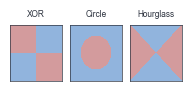

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(1.8, 0.8), constrained_layout=True)

axes[0].imshow(z_xor, origin="lower", aspect="auto", interpolation="none",
        extent=(*EXTENDS, *EXTENDS), alpha=0.5,
        cmap=sns.color_palette("vlag", as_cmap=True),
    )
sns.despine(ax=axes[0], top=False, right=False)
axes[0].set_xticks([])
axes[0].set_yticks([])
axes[0].set_xlim(*EXTENDS)
axes[0].set_ylim(*EXTENDS)


axes[1].imshow(z_circle, origin="lower", aspect="auto", interpolation="none",
        extent=(*EXTENDS, *EXTENDS), alpha=0.5,
        cmap=sns.color_palette("vlag", as_cmap=True),
    )
sns.despine(ax=axes[1], top=False, right=False)
axes[1].set_xticks([])
axes[1].set_yticks([])
axes[1].set_xlim(*EXTENDS)
axes[1].set_ylim(*EXTENDS)


axes[2].imshow(z_hourglass, origin="lower", aspect="auto", interpolation="none",
        extent=(*EXTENDS, *EXTENDS), alpha=0.5,
        cmap=sns.color_palette("vlag", as_cmap=True),
    )
sns.despine(ax=axes[2], top=False, right=False)
axes[2].set_xticks([])
axes[2].set_yticks([])
axes[2].set_xlim(*EXTENDS)
axes[2].set_ylim(*EXTENDS)

axes[0].set_title('XOR')
axes[1].set_title('Circle')
axes[2].set_title('Hourglass')

plt.savefig(f"../plots/sensor_tasks.svg")
plt.show()

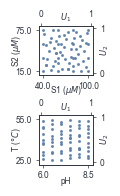

In [16]:
fig, axes = plt.subplots(2, 1, figsize=(0.7, 1.8), constrained_layout=False)

axes[0].scatter(*U_s.T, s=1.5**2)
axes[1].scatter(*U_pH_T.T, s=1.5**2)

axes[0].set_xlabel(r"S1 ($\mu M$)", va='bottom')
axes[0].set_ylabel(r"S2 ($\mu M$)", va='top')
axes[0].set_xlim(*EXTENDS)
axes[0].set_ylim(*EXTENDS)
axes[0].set_xticks([0, 1], extends_s1)
axes[0].set_yticks([0, 1], extends_s2)

axes[1].set_xlabel(r"pH", va='bottom')
axes[1].set_ylabel(r"T ($\degree C$)", va='top')
axes[1].set_xlim(*EXTENDS)
axes[1].set_ylim(*EXTENDS)
axes[1].set_xticks([0, 1], extends_pH)
axes[1].set_yticks([0, 1], extends_T)

axy = axes[0].twiny()
axy.set_xticks([0, 1])
axy.set_xlim(-0.05, 1.05)
axy.set_xlabel(r"$U_1$")

axx = axes[0].twinx()
axx.set_yticks([0, 1])
axx.set_ylim(-0.05, 1.05)
axx.set_ylabel(r"$U_2$")
axy.xaxis.set_label_coords(0.5, 1.1)
axx.yaxis.set_label_coords(1.1, 0.5)

axy = axes[1].twiny()
axy.set_xticks([0, 1])
axy.set_xlim(-0.05, 1.05)
axy.set_xlabel(r"$U_1$")

axx = axes[1].twinx()
axx.set_yticks([0, 1])
axx.set_ylim(-0.05, 1.05)
axx.set_ylabel(r"$U_2$")
axy.xaxis.set_label_coords(0.5, 1.1)
axx.yaxis.set_label_coords(1.1, 0.5)

plt.subplots_adjust(hspace=.8, wspace=0.2)
sns.despine(top=False, right=False)

plt.savefig(f"../plots/sensor_inputs.svg")

plt.show()

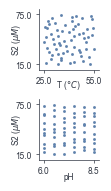

In [17]:
fig, axes = plt.subplots(2, 1, figsize=(1.0, 1.8), constrained_layout=True)

axes[0].scatter(*U_T_S2.T, s=1.5**2)
axes[1].scatter(*U_pH_S2.T, s=1.5**2)

axes[0].set_xlabel(r"T ($\degree C$)", va='bottom')
axes[0].set_ylabel(r"S2 ($\mu M$)", va='top')
axes[0].set_xlim(*EXTENDS)
axes[0].set_ylim(*EXTENDS)
axes[0].set_xticks([0, 1], extends_T)
axes[0].set_yticks([0, 1], extends_s2)

axes[1].set_xlabel(r"pH", va='bottom')
axes[1].set_ylabel(r"S2 ($\mu M$)", va='top')
axes[1].set_xlim(*EXTENDS)
axes[1].set_ylim(*EXTENDS)
axes[1].set_xticks([0, 1], extends_pH)
axes[1].set_yticks([0, 1], extends_s2)

# plt.subplots_adjust(hspace=1.2, wspace=0.5)

plt.savefig(f"../plots/SI_sensor_inputs.svg")

plt.show()

In [18]:
test_scores_all = [[None, None], [None, None], [None, None]]
test_scores_std_all = [[None, None], [None, None], [None, None]]

for i, y_task in enumerate([y_xor, y_circle, y_hourglass]):
    for j, (u, x) in enumerate(zip([U_s, U_pH_T], [X_s, X_pH_T])):
        y_pred, accuracies, train_scores, test_scores, test_scores_std = classification_task(u, x, y_task=y_task(u), n_repeats=10,)
        test_scores_all[i][j] = test_scores
        test_scores_std_all[i][j] = test_scores_std

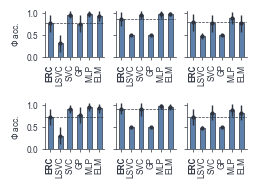

In [19]:
fig, axes = plt.subplots(2,3, figsize=(2.6, 1.8), sharey=True, constrained_layout=False)

for i, y_task in enumerate([y_xor, y_circle, y_hourglass]):
    for j, (u, x) in enumerate(zip([U_s, U_pH_T], [X_s, X_pH_T])):
        plot_scores(ax=axes[j][i], test_scores=test_scores_all[i][j], test_scores_std=test_scores_std_all[i][j])

axes[0,1].set_ylabel('')
axes[0,2].set_ylabel('')
axes[1,1].set_ylabel('')
axes[1,2].set_ylabel('')

plt.subplots_adjust(hspace=1.0, wspace=0.2)
plt.savefig(f"../plots/sensor_results.svg")
plt.show()

In [20]:
SI_test_scores_all = [[None, None], [None, None], [None, None]]
SI_test_scores_std_all = [[None, None], [None, None], [None, None]]

for i, y_task in enumerate([y_xor, y_circle, y_hourglass]):
    for j, (u, x) in enumerate(zip([U_T_S2, U_pH_S2], [X_T_S2, X_pH_S2])):
        y_pred, accuracies, train_scores, test_scores, test_scores_std = classification_task(u, x, y_task=y_task(u), n_repeats=10,)
        SI_test_scores_all[i][j] = test_scores
        SI_test_scores_std_all[i][j] = test_scores_std

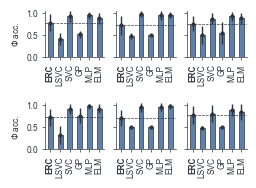

In [21]:
fig, axes = plt.subplots(2,3, figsize=(2.6, 1.8), sharey=True, constrained_layout=False)

for i, y_task in enumerate([y_xor, y_circle, y_hourglass]):
    for j, (u, x) in enumerate(zip([U_T_S2, U_pH_S2], [X_T_S2, X_pH_S2])):
        plot_scores(ax=axes[j][i], test_scores=SI_test_scores_all[i][j], test_scores_std=SI_test_scores_std_all[i][j])

axes[0,1].set_ylabel('')
axes[0,2].set_ylabel('')
axes[1,1].set_ylabel('')
axes[1,2].set_ylabel('')
plt.subplots_adjust(hspace=1.0, wspace=0.2)
plt.savefig(f"../plots/SI_sensor_results.svg")
plt.show()